# Understanding Time Series - 4

Time series is data with temporal dimension and plays a significant role in the financial industry. The justification of the importance lies within the interest of market participants in the development of the markets in the future. The try to generate forecasts by extrapolating historical data.This chapter uses traffic data from Wikipedia die forecast the traffic on a specific page using the wikipeidatrend CRAN package.

The data can be found at the following links: 
https://www.kaggle.com/c/web-traffic-time-series-forecasting


In [ ]:
install.packages("wikipediatrend")
require(wikipediatrend)
install.packages("stringr")
library(stringr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Import data

In [ ]:
install.packages("curl")
require(curl)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
id <- "1fojRdLN_k1tOfY26FC94lO0NGiQYd4Nh"
URL <- sprintf("https://docs.google.com/uc?id=%s&export=download", id)

#https://drive.google.com/file/d/1fojRdLN_k1tOfY26FC94lO0NGiQYd4Nh/view?usp=sharing
test <- curl(URL)

train_1_raw <- read.csv(test,header = TRUE, row.names = NULL)
train_1_raw <- train_1_raw[,-c(1,length(train_1_raw))]
head(train_1_raw)


,Page,X2015.07.01,X2015.07.02,X2015.07.03,X2015.07.04,X2015.07.05,X2015.07.06,X2015.07.07,X2015.07.08,X2015.07.09,⋯,X2016.12.19,X2016.12.20,X2016.12.21,X2016.12.22,X2016.12.23,X2016.12.24,X2016.12.25,X2016.12.26,X2016.12.27,X2016.12.28
,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2NE1_zh.wikipedia.org_all-access_spider,18,11,5,13,14,9,9,22,26,⋯,47,65,17,32,63,15,26,14,20,22
2,2PM_zh.wikipedia.org_all-access_spider,11,14,15,18,11,13,22,11,10,⋯,22,23,19,17,42,28,15,9,30,52
3,3C_zh.wikipedia.org_all-access_spider,1,0,1,1,0,4,0,3,4,⋯,2,4,3,3,1,1,7,4,4,6
4,4minute_zh.wikipedia.org_all-access_spider,35,13,10,94,4,26,14,9,11,⋯,18,23,10,32,10,26,27,16,11,17
5,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,4,11,7,48,9,25,13,3,11,27
6,5566_zh.wikipedia.org_all-access_spider,12,7,4,5,20,8,5,17,24,⋯,15,28,17,16,27,8,17,32,19,23


In [ ]:
train_1 <- train_1_raw
train_1[is.na(train_1)] <- 0

# Visualization and preparation

The overview of the dataset depicts the following information:

-   	Page column: name of the page, language of the page, type of accessing device and accessing agent

-   	Other columns: traffic for that page on each day of the observation period

The majority of time series analysis is focused on local, time-dependent features, whereas the models in this book are enhanced to access global features. Therefore, the page string is split up by underscores into smaller features which are easier to handle. The function for splitting up the page string is applied to every entry in the training set. The output is a list of text strings which are merged into a data frame. This data frame with the page information is then added to the initial data set.


In [ ]:
x1 <- word(as.character(train_1$Page),1,-4, sep = "_")
x2 <- word(as.character(train_1$Page),-3, sep = "_")
x3 <- word(as.character(train_1$Page),-2, sep = "_")
x4 <- word(as.character(train_1$Page),-1, sep = "_")
x1 <- as.data.frame(x1)
x2 <- as.data.frame(x2)
x3 <- as.data.frame(x3)
x4 <- as.data.frame(x4)
names(x1)[1] <- "Subject"
names(x2)[1] <- "Sub_Page"
names(x3)[1] <- "Access"
names(x4)[1] <- "Agent"
x1$Index <- seq.int(nrow(x1))
x2$Index <- seq.int(nrow(x2))
x3$Index <- seq.int(nrow(x3))
x4$Index <- seq.int(nrow(x4))

In [ ]:
train_1$Index <- seq.int(nrow(train_1))

In [ ]:
install.packages("dplyr")
require(dplyr)

install.packages("tidyverse")
require(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
train = left_join(train_1,x1,by="Index") %>% left_join(., x2, by="Index") %>% left_join(., x3, by="Index") %>% left_join(., x4, by="Index") 

# Aggregate global feature statistics

After preparing the data set, the distribution of the global features can be easily plotted with e.g. a bar chart.

In [ ]:
install.packages("tidyr")
library(tidyr)
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



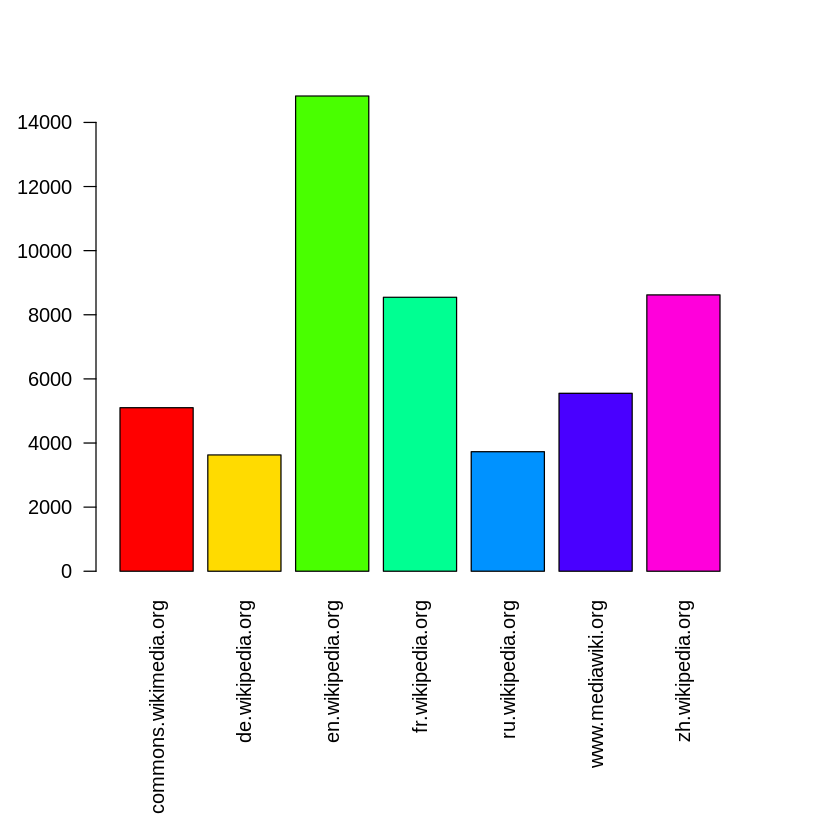

In [ ]:
par(mar=c(11,4,4,4))
barplot(table(train$Sub_Page),col= rainbow(7), las = 2)

The preceding plot depicts the quantity of time series available for each subpage showing that the data set includes pages from the English, Japanese, German, French, Chinese, Russian and Spanish Wikipedia sites. The plot also shows the number of time series available for the pages which are used to host media files (commons.wikipedia.org and www.mediawiki.org).

The following graph depicts the statistics for the type of access to the Wikipedia page, which are mobile-web and desktop. The third option, all-access, is the combination of both types.

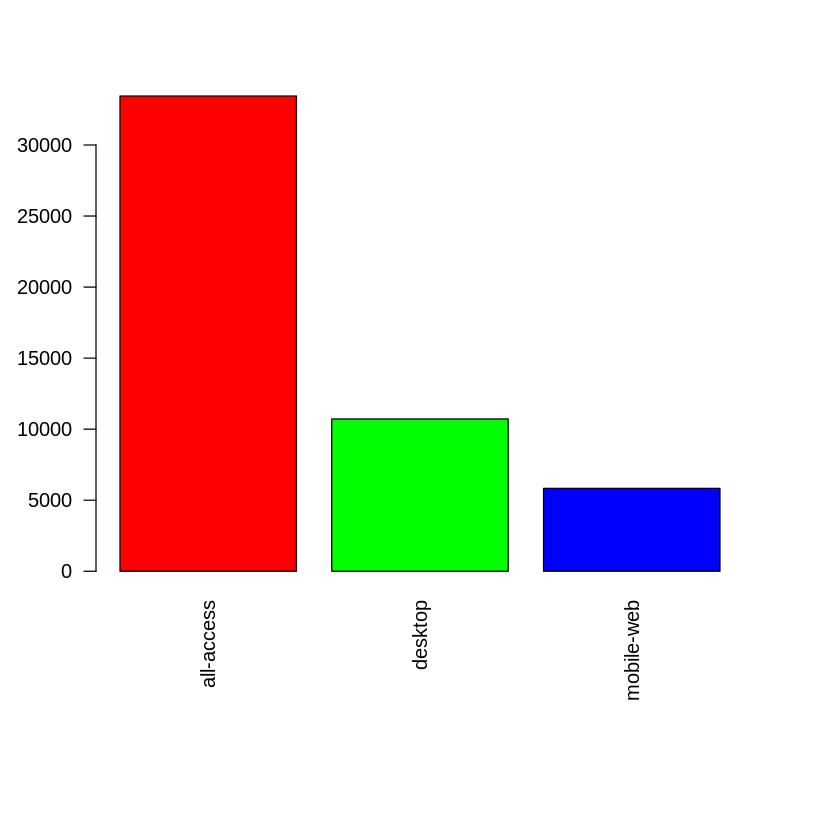

In [ ]:
par(mar=c(11,4,4,4))
barplot(table(train$Access),col=rainbow(3), las = 2)

The next graph depicts the quantity of time series for spider agents as well as all other agend types.

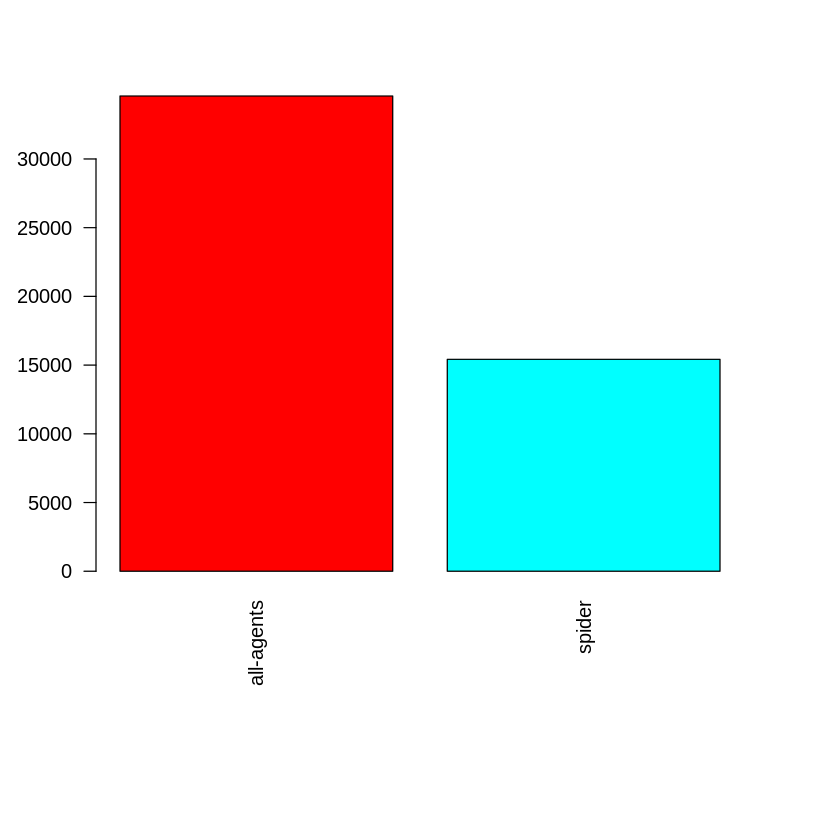

In [ ]:
par(mar=c(11,4,4,4))
barplot(table(train$Agent),col = rainbow(2), las = 2)

The next logical steps would include the analysis of every global feature and construct models around them. However, this is not necessary if enough data and computing power is available. If sufficient data is available, neural networks are capable of discovering effects of global features itself and create new features based on their interactions. There are two considerations for global features that need consideration:

1. 	If the distribution is overly skewed, the possibility exists that only a few instances possess a global feature which opens up the threat that the model overfits the global feature.

2. 	If features are to complex, they cannot be easily coded. Full Wikipedia articles or subject names for instance cannot be used straight away because there are too many of them.

# Examining the sample time series

To analyze the global features a few sample time series should be reviewed to develop an understanding of possible challenges. Therefore, the page views for the English article of Twenty One Pilots is plotted together with a 10-day rolling mean.

In [ ]:
data = train
index = 39458
window = 10
colx = ncol(train)-5
data = train[index,1:colx]

In [ ]:
data[2,] <- colnames(data)

Warning message in `[<-.factor`(`*tmp*`, iseq, value = "Page"):
“invalid factor level, NA generated”


In [ ]:
install.packages("zoo")
require(zoo)

install.packages("forecast")
require(forecast)

install.packages("graphics")
require(graphics)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘graphics’ is not available (for R version 3.6.3)”
Warning message:
“package ‘graphics’ is a base package, and should not be updated”


The graph shows that there are large spikes despite the use of a logarithmic axis. Therefore, it becomes apparent that a well-written and structured model needs to be able to handle large spikes like that.


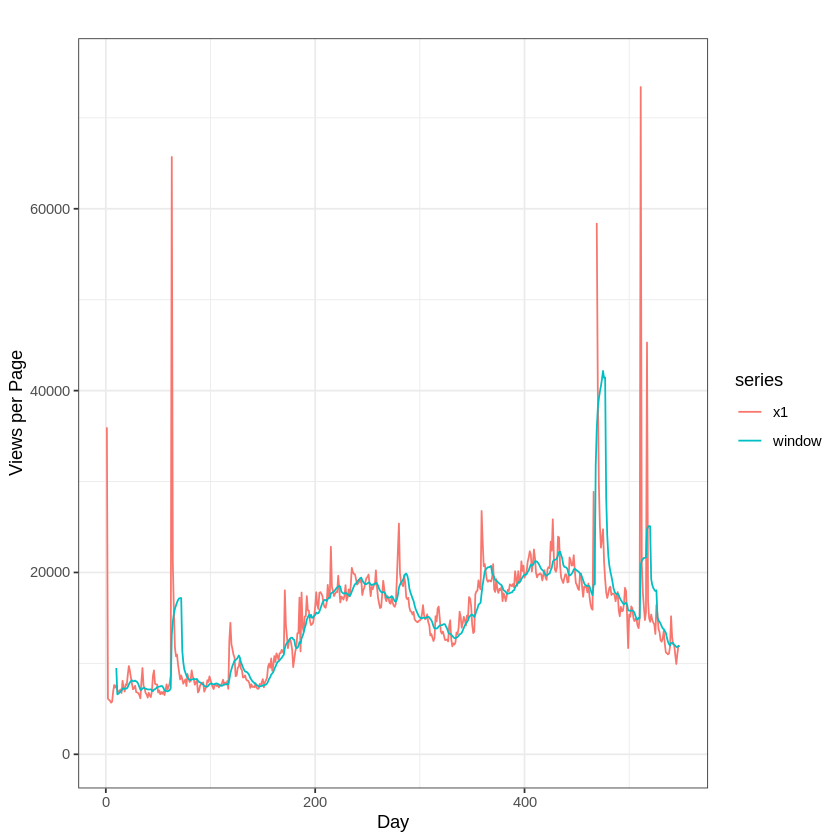

In [ ]:
x <- data[1,1:colx]
x <- as.numeric(x[1,])
y <- c(1:colx)
m1 <- matrix(x,colx,1)
m2 <- matrix(y,colx,1)
colnames(m1) <- c("xx")
colnames(m2) <- c("yy")
m <- cbind(m2,m1)
m <- as.data.frame(m)

x1 <- ts(m[,2], frequency = 1)
x1  <- cbind(x1, window = zoo::rollmeanr(x1, k = 10))
forecast::autoplot(x1) + ylim(0,75000) + xlab("Day") + ylab("Views per Page") + theme_bw()

To create comparability, the page views for the Twenty One Pilot articles are plotted for all languages.

The graph shows that there is a certain correlation between the different time series as well as that the data sets are not stationary as they change means and standard deviations over time. Time series are rarely stationary. Therefore, the subsequent section will provide useful tools to deal with nonstationarity.

In [ ]:
trainx <- train
trainx <- subset(trainx, Subject=="Twenty_One_Pilots") 

In [ ]:
trainx <- aggregate(trainx[,2:548], list(trainx$Sub_Page), sum)

In [ ]:
x <- t(trainx)
x <- as.data.frame(x)
x$ID <- seq.int(nrow(x))

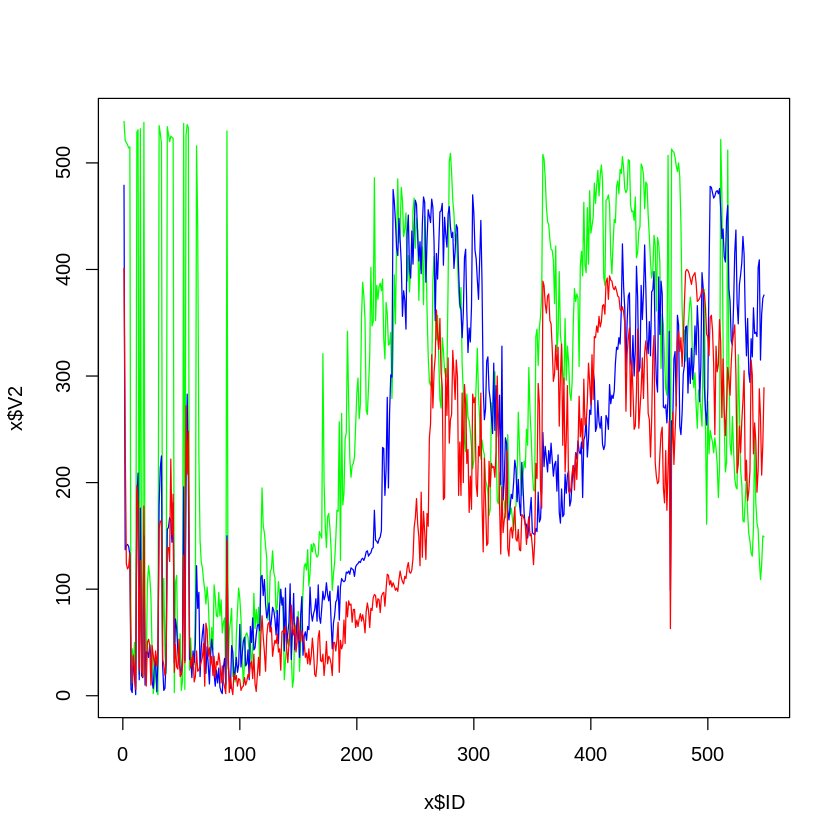

In [ ]:
plot(x$ID,x$V2, type = "l",col = "green")
lines(x$ID,x$V3, type = "l", col = "blue")
lines(x$ID,x$V4, type = "l", col = "red")

#Fast Fourier transformations


The FT shows the amount of oscillation within particular frequency in a function. The FT scans the entire frequency spectrum and records at what frequency strong signals exist. This method is beneficial if the detection of periodic patterns is desired. In our example, the knowledge about the traffic of the same day last week certainly helps the model to learn. If the function itself and the Fourier transform are discrete then it is called a discrete Fourier transformation (DFT). The fast Fourier transform (FFT) is used to compute for computing the DFT and plays an important role in scientific computing.

In R the XYZ-package has the FFT formula built in. Using the subsequent code, it is possible to extract the time series measurements without the global features from the training set and run the FFT algorithm. Then, the magnitudes of the transformation are computed. To receive a better understanding of the general behavior of the FT of all the time series datasets, the mean per frequency is calculated which requires the specification of the axis.

In [ ]:
#data = train
#colx = ncol(train)-5

In [ ]:
#data <- data[,1:colx]
#data <- data.matrix(data, rownames.force = NA)
#head(data)

Page,X2015.07.01,X2015.07.02,X2015.07.03,X2015.07.04,X2015.07.05,X2015.07.06,X2015.07.07,X2015.07.08,X2015.07.09,⋯,X2016.12.19,X2016.12.20,X2016.12.21,X2016.12.22,X2016.12.23,X2016.12.24,X2016.12.25,X2016.12.26,X2016.12.27,X2016.12.28
769,18,11,5,13,14,9,9,22,26,⋯,47,65,17,32,63,15,26,14,20,22
771,11,14,15,18,11,13,22,11,10,⋯,22,23,19,17,42,28,15,9,30,52
787,1,0,1,1,0,4,0,3,4,⋯,2,4,3,3,1,1,7,4,4,6
817,35,13,10,94,4,26,14,9,11,⋯,18,23,10,32,10,26,27,16,11,17
823,0,0,0,0,0,0,0,0,0,⋯,4,11,7,48,9,25,13,3,11,27
825,12,7,4,5,20,8,5,17,24,⋯,15,28,17,16,27,8,17,32,19,23


In [ ]:
#fft_complex <- fft(data)
#fft_mag <- sqrt((Re(test)*Re(test))+(Im(test)*Im(test)))

In the example the series are stacked in rows which allows the computation of the column-means which equal the desired frequency means. The created frequencies are combined in a list in the form of day/total days in dataset. This is trimmed to receive the frequency in a weekly range.

#Autocorrelation

Autocorrelation is defined as the correlation between two elements of a series separated by a given interval. Running autocorrelation_plot plots the correlation between elements with different lag times.

In [ ]:
data = train
colx = ncol(train)-5
data <- data[,2:colx]
data <- data.matrix(data, rownames.force = NA)

In [ ]:
data1 <- data[1:500,]
data1 <- t(data1)

The graphic shows that shorter intervals are characterized by higher autocorrelation than longer intervals. Spikes in the graph are possible caused by specific events with a significant impact on the time series.
The general pattern of the frequencies can be analyzed by drawing 1,000 of these autocorrelation plots. 

The graph shows that significant differences exist and that there is a lot of noise within the chart. Hence, it might be of use to incorporate annual lagged page views as a time-dependent feature as well as the autocorrelation for one-year time intervals as a global feature.


In [ ]:
myfun <- function(x)
{
  eps <- data1[,x]
  ACF <- acf(eps, lag.max = 547,plot = FALSE) 
  return(list(acf = ACF[["acf"]],lags = ACF[["lag"]] ) )    
}

ACF <- sapply(1:10,myfun)

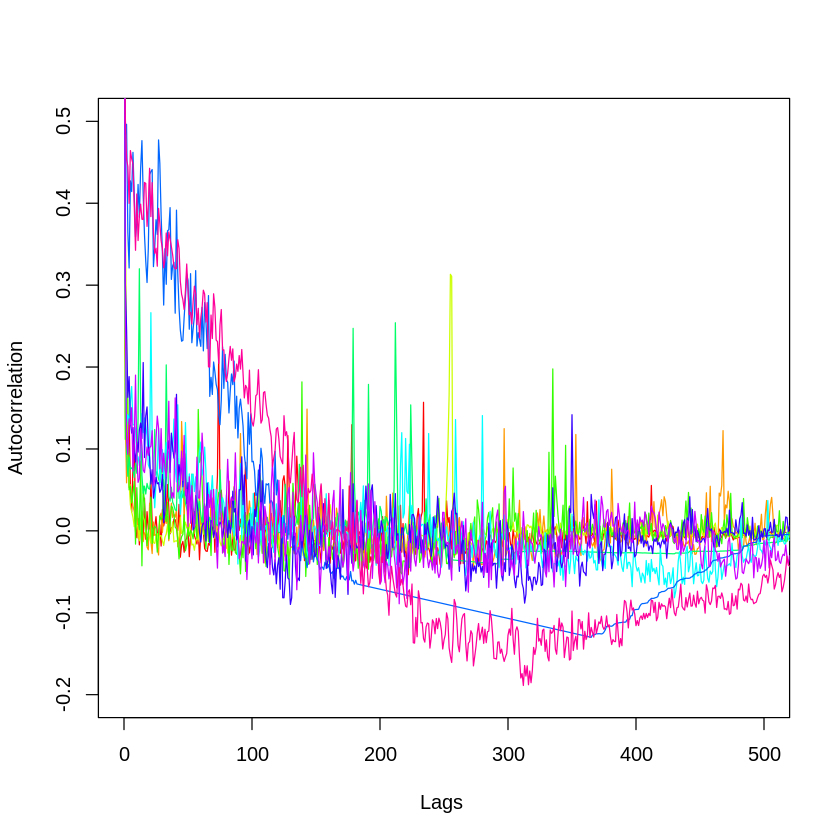

In [ ]:
plot(NA,xlim=c(0,500), ylim=c(-0.2,0.5), xlab="Lags ", ylab="Autocorrelation")
for(i in 1:10){
  lines( x = unlist(ACF["lags", i ]), y = unlist( ACF["acf",  i ] ), col= rainbow(10)[i])
}

#Establishing a training and testing regime

Regardless of the size of the dataset the question of how the data should be split between training, validation, and testing arises. In this example, the training data is given which simplifies the decision. There are two possible scenarios of splitting the validation set

-   	In the walk-forward split, all 145,000 series are used for training. The validation then uses more recent data from all series. If there are only few series with multiple data observations per series available, a walk-forward split is preferable.

-   	The side-by-side split uses a number of series for training and the rest of the series is used for validation. If there are a lot of series but few observations per series available, a side-by-side split is preferable.

In this case a side-by-side split is preferable, as the dataset has a lot of series and only few observations. In this example the traffic for 50 days is forecasted. The following code separates the last 50 days of each series from the rest. Subsequently the training data is separated from the validation set.


In [ ]:
data2 <- train  

In [ ]:
colx = ncol(data2)-5
data2 <- data2[,1:colx]
data2 <- as.data.frame(data2)

In [ ]:
install.packages("caret")
library(caret) #this package has the createDataPartition function

In [ ]:
dim(data2)
X <- data2[,2:500]
Y <- data2[,500:548]
X$ID <- seq.int(nrow(X))
Y$ID <- seq.int(nrow(Y))

In [ ]:
trainIndex <- createDataPartition(X$ID,p=0.75,list=FALSE)

In [ ]:
X_TRAIN <- X[trainIndex,] #training data (75% of data)
X_TEST <- X[-trainIndex,] #testing data (25% of data)
X_TRAIN <- subset(X_TRAIN, select=-c(ID))
X_TEST <- subset(X_TEST, select=-c(ID))

Y_TRAIN <- Y[trainIndex,] #training data (75% of data)
Y_TEST <- Y[-trainIndex,] #testing data (25% of data)
Y_TRAIN <- subset(Y_TRAIN, select=-c(ID))
Y_TEST <- subset(Y_TEST, select=-c(ID))

The mean absolute percentage error (MAPE) is used as a loss and evaluation metric.


#Median forecasting

The median sits exactly in the middle of a distributions and has the advantages that it removes noise, it is less subtle to outliers compared to other metrics such as the mean, and the they are easy to compute. To make a forecast, the median over a lookback window with a size of 50 values in the training data set is computed.

In [ ]:
colXTrain <- ncol(X_TRAIN)

In [ ]:
lookback = 50
lb_data = X_TRAIN[,(colXTrain-lookback+1):colXTrain]

In [ ]:
lb_data <- data.matrix(lb_data)

In [ ]:
install.packages("matrixStats")
require(matrixStats)

In [ ]:
lb_data <- rowMedians(lb_data,na.rm = TRUE)
lb_data <- as.data.frame(lb_data)

In [ ]:
idx = 15000

X <- X_TRAIN[idx,]
Y <- Y_TRAIN[idx,]
Z <- lb_data[idx,]


Z <- rep(Z,ncol(Y))
X <- t(X)
Y <- t(Y)
Z <- as.data.frame(Z)

rownames(X) <- NULL
colnames(X) <- "a"
rownames(Y) <- NULL
colnames(Y) <- "a"
rownames(Z) <- NULL
colnames(Z) <- "a"

X <- as.data.frame(X)
Y <- as.data.frame(Y)
Z <- as.data.frame(Z)

In [ ]:
date <- c(1:(nrow(X)+nrow(Y)))
valuex <- X$a
valuexmod <- c(valuex,rep(NA, nrow(Y)))
valuey <- Y$a
valueymod <- c(rep(NA, nrow(X)), valuey)
valuez <- Z$a
valuezmod <- c(rep(NA, nrow(X)), valuez)

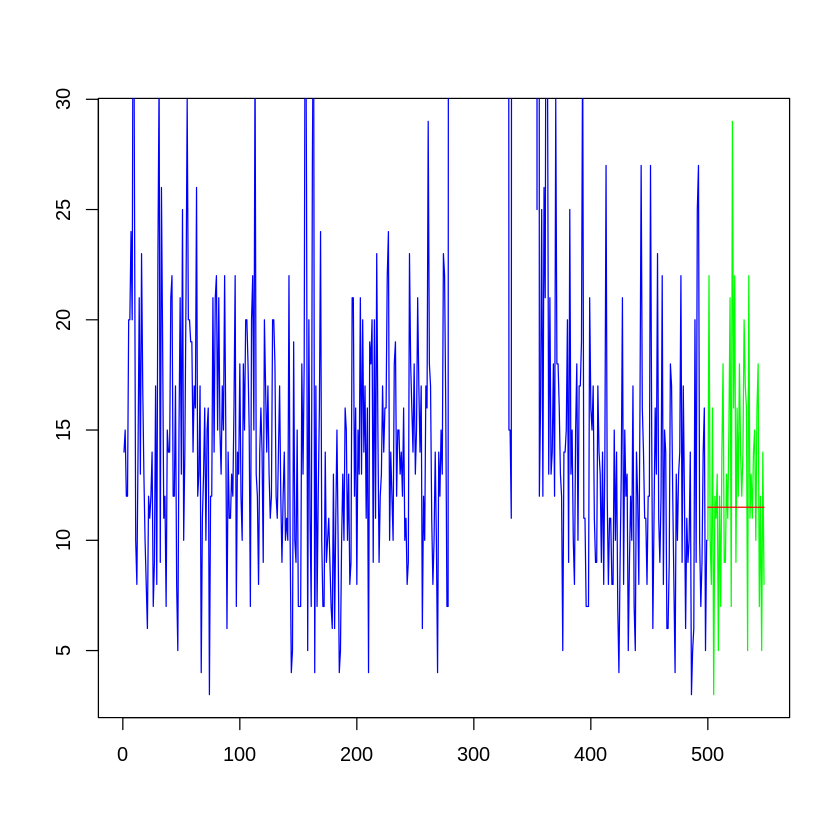

In [ ]:
plot(date, valueymod, type = "l",col = "green",xlab=" ",ylab=" ")
lines(date, valuexmod, type = "l", col = "blue")
lines(date, valuezmod, type = "l", col = "red")

#ARIMA

Median forecasting has trouble with both, seasonality and stationarity. If the mean of a series continuously shifts, then median forecasting will not continue the trend. If a time series shows cyclical behavior, then the median will not continue the cycle. The Autoregressive Integrated Moving Average (ARIMA) consists of three components:

1. 	Autoregression: The relationship between a value and a number of lagged observations

2. 	Integrated: The difference between raw observation to make the time series stationary

3. 	Moving average: The residual errors from a moving average
This example uses five lagged observations, one differentiation 
and a moving average window of five. This decision has to be made manually. 


In [ ]:
data <- data.matrix(X_TRAIN, rownames.force = NA)
data <- data[,-c(1)]

In [94]:
install.packages("arm")
require(arm)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘png’, ‘jpeg’, ‘checkmate’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘Formula’, ‘latticeExtra’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘lme4’, ‘abind’, ‘coda’, ‘Hmisc’


Loading required package: arm

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loading required package: lme4


arm (Version 1.11-2, built: 2020-7-27)


Working directory is /content




In [95]:
model <- Arima(data[1000,], order=c(5,1,5))
model.resid <- residuals(model)


	Ljung-Box test

data:  Residuals from ARIMA(5,1,5)
Q* = 0.27227, df = 3, p-value = 0.9652

Model df: 10.   Total lags used: 13



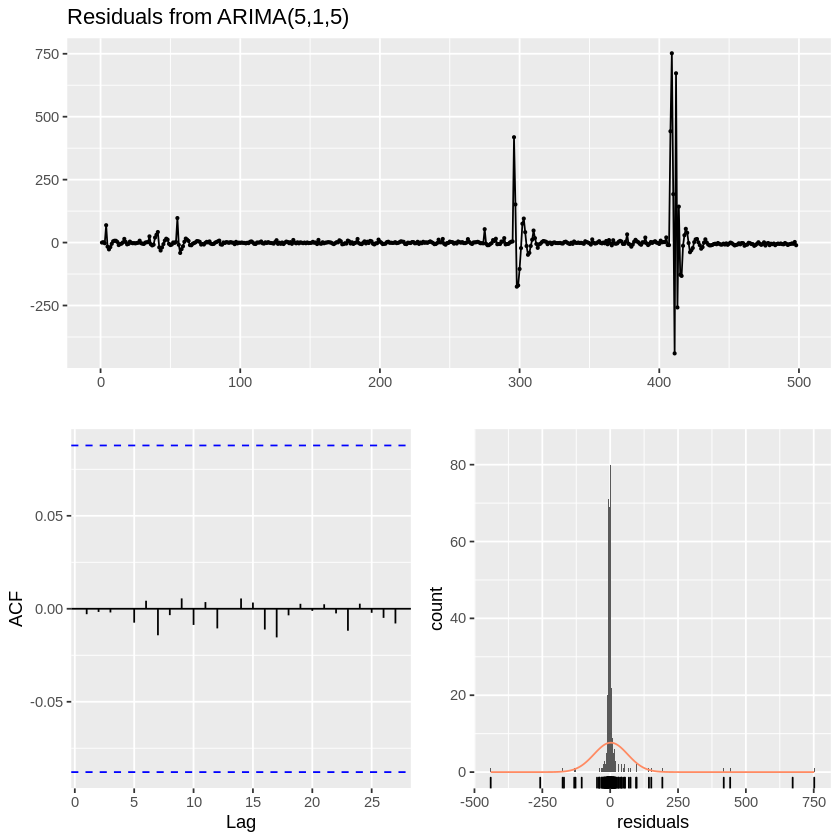

In [96]:
checkresiduals(model)

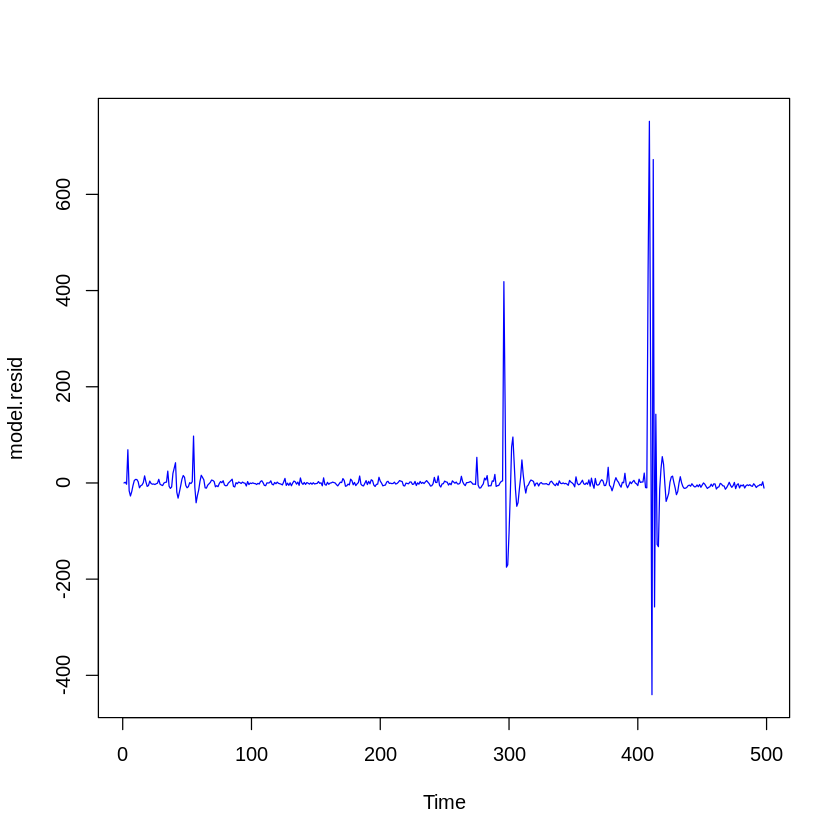

In [97]:
plot(model.resid, type = "l",col = "blue")

The kernel density estimator, a mathematical method designed to estimate distributions without the need to model them, can be used to determine whether the model is skewed.

In [ ]:
x <- forecast(model,h=48)
x <- as.data.frame(x)
x <- x$`Point Forecast`
x <- as.data.frame(x)

In [ ]:
X <- X_TRAIN[1000,480:499]
Y <- Y_TRAIN[1000,0:48]
Z <- x

X <- t(X)
Y <- t(Y)
Z <- as.data.frame(Z)

rownames(X) <- NULL
colnames(X) <- "a"
rownames(Y) <- NULL
colnames(Y) <- "a"
rownames(Z) <- NULL
colnames(Z) <- "a"

X <- as.data.frame(X)
Y <- as.data.frame(Y)
Z <- as.data.frame(Z)

In [ ]:
date <- c(1:(nrow(X)+nrow(Y)))
valuex <- X$a
valuexmod <- c(valuex,rep(NA, nrow(Y)))
valuey <- Y$a
valueymod <- c(rep(NA, nrow(X)), valuey)
valuez <- Z$a
valuezmod <- c(rep(NA, nrow(X)), valuez)

The resulting graph shows that the model represents a Gaussian distribution with a mean of zero. Subsequently, the forecast is executed and plotted. The forecast provides predictions but also the standard error and 95% confidence interval.

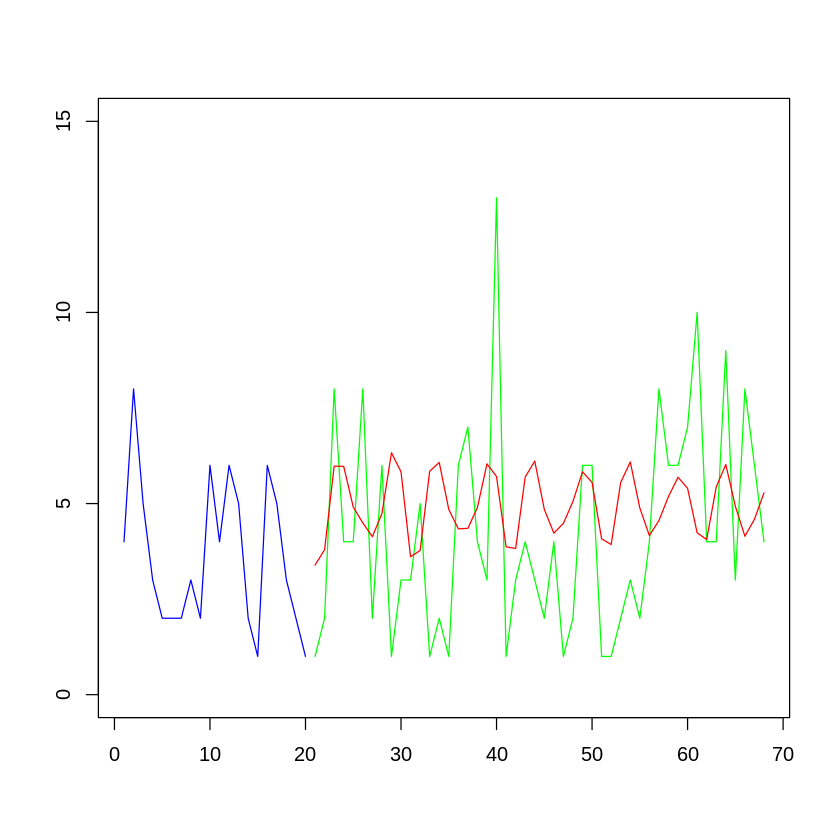

In [ ]:
plot(date, valueymod, type = "l",col = "green", ylim = c(0,15), xlab =" ",ylab=" ")
lines(date, valuexmod, type = "l", col = "blue")
lines(date, valuezmod, type = "l", col = "red")

# Kalman Filters #


Kalman filters are a method to extract a signal from either noisy or incomplete data. The fundamental idea is that there is a hidden state of a system that is not directly observable but noisy measurements can be obtained. For instance, the temperature inside a rocket engine cannot be directly measured from within. Therefore, it is measured from the outside. External factors distort the result, therefore, a method which is capable of dealing with the noise is necessary. 
The Kalman filters fit a function by estimating a state transition matrix, an observation matrix, the variance on which the randomness is based as well as the variance of the observation noise. For all estimations, prior values are needed. The transition matrix describes one hidden level, which can be interpreted as the real interest as well as seasonality. The observation model depicts the general interest plus seasonality to a single measurement. The noise priors are estimates scaled by a “smoothing factor”. It is important that the dimensions of the priors allow for matrix multiplication. The following codes executes these estimations.


In [ ]:
install.packages("pracma")
library(pracma)


In [ ]:
n_seasons<-7

In [ ]:
state_transition<-matrix(0, n_seasons + 1, n_seasons + 1)
state_transition[1,1]<-1
state_transition[2,2:n_seasons]<-(-1.0)
state_transition[3:(n_seasons + 1),2:(n_seasons)]<-eye(n_seasons - 1)
state_transition

In [ ]:
observation_model<-cbind(matrix(1, 1, 2), matrix(0, 1, n_seasons-1))
smoothing_factor<-5.0
level_noise<-0.2 / smoothing_factor
observation_noise<-0.2
season_noise<-1e-3

observation_model


In [ ]:
process_noise_cov<-Diag(cbind(matrix(c(level_noise, season_noise), 1), matrix(0, 1, n_seasons-1)))**2
observation_noise_cov<-observation_noise**2
process_noise_cov
observation_noise_cov

When using Phyton, the Kalman filtering library of Otto Seiskari is used. It can be accessed by choosing the XYZ-package. His library can be used by, first, defining the priors, the parameters are estimated and then the forecast is executed. The results of the compute function include the state and oberservation estimates from the smoothing process as well as predicted internal states and observations. As only the non-seasonal state value is desired, the mean is indexed. As we do not use Phyton, but R, we have to look for an equivalent package here. Unortunately, there is no equivalent package. Therefore, it was tried to use another approach, which has to be developped further.

In [ ]:
# other approaches
install.packages("FKF")
library("FKF")


In [ ]:
KalmanFilter <- function(P0=matrix(1), dt=matrix(0), ct=matrix(0), Tt=array(1,c(1,1,1)), Zt=array(1,c(1,1,1)),
                         HHt=array(1,c(1,1,1)), GGt=array(1,c(1,1,1))){
  return(
    function(observation, initialState){
      fkf.obj <- fkf(a0=initialState,P0=P0,dt=dt,ct=ct,Tt=Tt,Zt=Zt,HHt=HHt,GGt=GGt,yt=observation)
      return(fkf.obj)
    }
  )
}

In [ ]:
kalman_res <- KalmanFilter(Tt=state_transition, HHt=array(process_noise_cov,c(1,1,1,1,1,1,1,1)), Zt=observation_model, GGt=array(observation_noise_cov,c(1,1,1,1,1,1,1,1)))
kalman_train <- colMeans(subset(train_1, select = -c(Page) ))

data.matrix(kalman_train)
kalman_res(data.matrix(kalman_train), 0)

TBD here - No equivalent package in R 

In [ ]:
join_train<-merge(merge(merge(merge(train_1, x1), x2), x3), x4)


# Forecasting with neural networks
In the first part of the second half of this chapter, a simple neural network will be build that only forecasts the next time step. The spikes in the series are very large, therefore, log-transformed page views are used as input and output. Neural networks have the advantage that they can take a high number of features in both, in addition to very high-dimensional data. On the other side, it is important to be cautious about what features are used as input. 

In [ ]:
cols<-names(join_train)
cols<-cols[3:(length(cols)-4)]


For each series, we will assemble the following features:

*  log_view: The natural logarithm of page views
*  days: One-hot encoded weekdays
*  year_lag: The value of log_view from 365 days ago
*  halfyear_lag: The value of log_view from 182 days ago
*  quarter_lag: The value of log_view from 91 days ago
*  page_enc: The one-hot encoded subpage
*  agent_enc: The one-hot encoded agent
*  acc_enc: The one-hot encoded access method
*  year_autocorr: The autocorrelation of the series of 365 days
*  halfyr_autocorr: The autocorrelation of the series of 182 days
*  quarter_autocorr: The autocorrelation of the series of 91 days
*  medians: The median of page views over the lookback period












### Weekdays 
Each day shows different browsing behavior which means that the weekday needs to be encoded. First the date strings are turned into the respective weekday. Further each weekday is turned into an integer (1-7). The resulting array is reshaped into a rank-2 tensor with shape so that the one-hot encoder knows that there are many observations, but only one feature. Lastly, the days are one-hot encoded. Subsequently, a new dimension is added to the tensor showing that we only have one “row” of the dates.

In [ ]:
install.packages("superml")
install.packages("mltools")
install.packages("kerasR")
library(superml)
library(mltools)
library(kerasR)

In [ ]:
library(data.table)
install.packages("dummies")
library(dummies)

In [ ]:
weekday_headers <- weekdays(as.Date(cols, tryFormats = c("X%Y.%m.%d", "X%Y/%m/%d")))
lbl <- LabelEncoder$new()
day_one_hot <- lbl$fit_transform(weekday_headers)
table <- as.data.table(day_one_hot, keep.rownames="weekday")
table <- cbind(table, dummy(table$day_one_hot))
day_one_hot <- expand_dims(table, 0)
day_one_hot

Later the encoders for the agents are needed. Therefore, the array is repeated along this axis:

In [ ]:
lbl_agent <- LabelEncoder$new()
agent_enc <- lbl$fit_transform(join_train$Agent)
table <- as.data.table(agent_enc)
agent_one_hot <- cbind(table, dummy(table$agent_enc))
agent_one_hot

A LabelEncoder is created which is able to transform the agent name strings into integers. Similar to the weekdays, the agent names are one-hot encoded. The same is done for subpages and access methods.

In [ ]:
lbl_page <- LabelEncoder$new()
page_enc <- lbl$fit_transform(join_train$Sub_Page)
table <- as.data.table(page_enc)
page_one_hot <- cbind(table, dummy(table$page_enc))
page_one_hot

In [ ]:
lbl_acc <- LabelEncoder$new()
acc_enc <- lbl$fit_transform(join_train$Agent)
table <- as.data.table(acc_enc)
acc_one_hot <- cbind(table, dummy(table$acc_enc))
acc_one_hot

Now the lagged features are taken care of. Neural networks could detect what past events are relevant for forecasting purposes. However, this is difficult due to the vanishing gradient problem. The following code creates an array lagged by a number of days:

In [ ]:
lag_arr <- function(arr, lag, fill) {
  filler <- matrix(-1, length(arr), lag)
  comb <- rbind(filler,arr)
  result <- comb[,1:length(arr[1])]
  return(result)
}

The new array has as many rows as the original array but its series length/width, is the number of lagged days. The array is attached to the front of the original array and the elements in the back to the original array series are removed in order to get back to the original length/width. The model needs to know about the degree of autocorrelation for different time intervals which is computed by shifting the series by the amount of desired lags.

In [ ]:
single_autocorr <- function(series, lag) {
  if (length(series) > lag) {
    s1 <- series[,lag:length(series)]
    s2 <- series[,1:(length(series) - lag)]
    ms1 <- colMeans(s1)
    ms2 <- colMeans(s2)
    ds1 <- s1 - ms1
    ds2 <- s2 - ms2

    if (ncol(ds1) > ncol(ds2)) {
      ds1 <- ds1[ -c((ncol(ds2) + 1):ncol(ds1)) ]
    }
    if (ncol(ds1) < ncol(ds2)) {
      ds2 <- ds2[ -c((ncol(ds1) + 1):ncol(ds2)) ]
    }
    
    divider <- sqrt(sum(ds1 * ds1)) * sqrt(sum(ds2 * ds2))
    if (divider == 0) {
      result <- 0
    }
    else {
      result <- sum(ds1 * ds2) / divider
    }
  }
  else {
    result <- 0
  }
  
  return(result)
}

This function can also be used to create a batch of autcorrelation features: 

In [ ]:
batc_autocorr <- function(data,lag,series_length) {
  corrs <- c()
  for (i in 1:length(data)) {
    c <- single_autocorr(data, lag)
    corrs[i] <- c
  }
  corr <- expand_dims(corrs, 0) 
  corr <- expand_dims(corr, 0) 
  corr <- rep(corr, series_length)
  return (corr)
}

First, the autocorrelation for each series is calculated, then the correlations are fused together into an array, and finally the autocorrelation is repeated of the complete length of the series.

In [ ]:
get_batch <- function(train, start=1, lookback=100) {
  if ((start + lookback) <= (length(colnames(train)) - 5 + 1)) {
    data <- subset(train, select = -c(Page, Subject, Sub_Page, Access, Agent, Index) )
    target <- subset(train, select = -c(Page, Subject, Sub_Page, Access, Agent, Index) )
    target <- log1p(target)

    log_view <- expand_dims(log1p(data), -1)
    days <- day_one_hot[start:(start+lookback)]
    days <- rep(days, length(train))

    year_lag <- lag_arr(log_view,365,-1)
    halfyear_lag <- lag_arr(log_view,182,-1)
    quarter_lag <- lag_arr(log_view,91,-1)

    lbl_agent <- LabelEncoder$new()
    
    
    agent_enc <- lbl$fit(train$Agent)
    table <- as.data.table(acc_enc)
    agent_enc <- cbind(table, dummy(table$acc_enc))
    agent_enc <- expand_dims(agent_enc, 1)
    agent_enc <- rep(agent_enc, lookback)

    lbl_page <- LabelEncoder$new()
    page_enc <- lbl$fit(train$Sub_Page)
    table <- as.data.table(page_enc)
    page_enc <- cbind(table, dummy(table$page_enc))
    page_enc <- expand_dims(page_enc, 1)
    page_enc <- rep(page_enc, lookback)

    lbl_acc <- LabelEncoder$new()
    acc_enc <- lbl$fit(train$Agent)
    table <- as.data.table(acc_enc)
    acc_enc <- cbind(table, dummy(table$acc_enc))
    acc_enc <- expand_dims(acc_enc, 1)
    acc_enc <- rep(acc_enc, lookback)

    year_autocorr <- batc_autocorr(data,lag=365, series_length=lookback)
    halfyr_autocorr <- batc_autocorr(data,lag=182, series_length=lookback)
    quarter_autocorr <- batc_autocorr(data,lag=91, series_length=lookback)

    medians <- median(as.numeric(unlist(data)))
    medians <- expand_dims(medians,-1)
    medians <- expand_dims(medians,-1)
    medians <- rep(medians,lookback)
    
    batch <- cbind(log_view,
    days,
    year_lag,
    halfyear_lag,
    quarter_lag,
    page_enc,
    agent_enc,
    acc_enc,
    year_autocorr,
    halfyr_autocorr,
    quarter_autocorr,
    medians)

    newList <- list(batch, target)

    return (newList)
  }
  return ()

}


Subsequently the previous code is described to ensure that the reader is able to follow:
1.	Ensuring that there is enough data to create a lookback window and a target from the starting point
2.	Separation of lookback window from the training data
3.	Separation of target and taking the one plus logarithm of it
4.	Taking the one plus logarithm of the lookback window and adding a feature dimension
5.	Deducting the days from the calculated one-hot encoding of days and repeats it for each time series
6.	Calculating the lag features for year, half-year and quarterly lag
7.	Encoding the global features using the preceding defined encoders
8.	Repeating step 7
9.	Repeating step 7 and 8
10.	Computing the year, half-year, and quarterly autocorrelation
11.	Computing the median for the lookback data
12.	Fusing all features into one batch

Lastly, the created get_batch function is used to write a generator which loops over the original training set and passes a subset into the get_batch function. The following lines of code is the function used to train and validate the data.


In [ ]:
install.packages("iterators")
library(iterators)

In [ ]:
generate_batches <- function(train,batch_size = 32, lookback = 100) {
  num_samples = length(train)
  num_steps = length(colnames(train)) - 5
  n <- 0
  t_batch <- NULL
  t_target <- NULL
 
  while (n < 5) {
    for (i in 1:floor(num_samples / batch_size)) {
      batch_start <- (i - 1) * batch_size + 1
      batch_end <- batch_start + batch_size
      seq_start <- sample(1:(num_steps - lookback), 1)
      batch <- get_batch(train[batch_start:batch_end,], start=seq_start)
      
      if (length(batch) == 2) {
        if (is.null(t_batch)) {
          t_batch <- batch[1]
        }
        else {
          t_batch <- rbind(t_batch, batch[1])
        }
        if (is.null(t_target)) {
          t_target <- batch[2]
        }
        else {
          t_target <- rbind(t_target, batch[2])
        }
      }
      
    }
    n <- n + 1
  }
  return (list(t_batch, t_target))
}

### Conv1D

This section is about a version of convolutional filters that can slide over sequences one-dimensionally and produce an output in form of another sequence. The following code builds a ConvNet that expects a fixed input length:

In [ ]:
install.packages("keras")
library(keras)

In [ ]:
n_features <- 29
max_len <- 100
model <- keras_model_sequential()
model %>%
  layer_conv_1d(16,5, input_shape = c(100,29)) %>%
  layer_activation('relu') %>%
  layer_max_pooling_1d(5) %>%
  layer_conv_1d(16,5) %>%
  layer_activation('relu') %>%
  layer_max_pooling_1d(5) %>%
  layer_flatten() %>%
  layer_dense(1)
  

keras_compile(model, optimizer='adam', loss='mean_absolute_percentage_error')
summary(model)


In addition to the conv1d and activation layer, there are two more layers: The maxpooling1d takes a piece of the sequence with a specified length and returns the maximum element in the sequence for each channel. Afterwards, the flatten layer transforms the two-dimensional sequence tensor into a one-dimensional flat tensor.

The applied model complies and is then trained on the generator, which was written earlier. The overall dataset is split in order to receive separated train and validation sets. Based on these sets generators are created. Finally, the model is trained on a generator.

In [ ]:
batch_size <- 64
total_set <- get_batch(join_train)
X_train <- total_set[1]
Y_train <- total_set[2]

In [ ]:
keras_fit(model, X_train, Y_train, batch_size = batch_size, epochs = 20,
            verbose = 0, validation_split = 0.1)

The validation loss is still high. The absolute loss is never a good indicator of how well the model performs. The loss will be reduced later in this chapter. 

# Dilated and causal convolution #
It is important to ensure that the model is not affected by a look-ahead bias. Standard convolution ignores the direction of convolution into account. Causal convolution shifts the filter in the right direction by ensuring that the output at time t derives from inputs from time t-1. Another useful technique is the dilated convolutional network, which means that the filter only accesses every nth element. A dilation rate of 4 means that only every 4th element is accessed. 


# Simple RNN #
Giving the neural network a memory is another way of making order matter within the network which can be done with recurrent neural networks (RNN). RNNs contain recurrent layers that can remember their last activation and use the sequence as input. For each element a matrix multiplication is computed and the result is run through an activation function. It then retains its own activation. As soon as the next item of the sequence arrives, the matrix multiplication is performed again but the previous activation is included in the multiplication. The recurrent layer adds the result of both operations together and passes it through the activation function again. Only the size of the recurrent layer needs to be specified manually. To stack multiple RNNs in Keras, the following code needs to be run:

In [ ]:
model <- keras_model_sequential()
model %>%
  layer_simple_rnn(16, return_sequences=True, input_shape=(max_len,n_features))) %>%
  layer_simple_rnn(32, return_sequences = True) %>%
  layer_simple_rnn(64) %>%
  layer_dense(1)

keras_compile(model, optimizer='adam', loss='mean_absolute_percentage_error')
summary(model)

The model can be fitted:

In [ ]:
keras_fit_generator(model, train_gen,
  epochs=20,
  steps_per_epoch=floor(n_train_samples / batch_size),
  validation_data=val_gen,
  validation_steps=floor(n_val_samples / batch_size))
  

The result enables to see that a simple RNN is a significant improvement to the convolutional model in terms of absolute loss. 

# LSTM #


RNNs should be able to retain long-term memories. However, in practice, this is often not the case due to the vanishing gradients problem. In response the Long Short-Term Memory layer was created. It functions better in the long-term but still struggles if the relevant observations are too far behind. Therefore, lagged observations are included manually. 

### The carry
The carry, which can be described as conveyer belt that runs along the RNN layer, is an integral addition of an LTSM compared to RNNs. At each time step, the carry is fed into the RNN layer. The new carry is then computed from the input, RNN output, and old carry in a separate operation. 

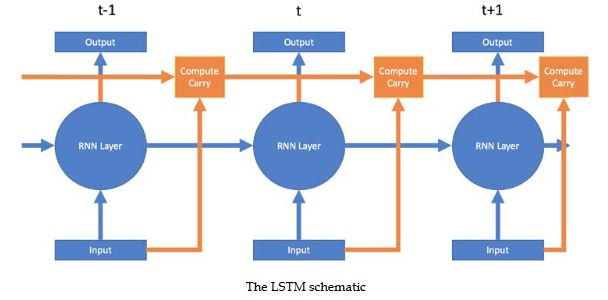

The standard theory claims that the LSTM layer learns what to add and what to forget. However, in practice, it is not known what happens inside an LSTM. Besides, you should note that LSTM functions do not need an extra activation function.

LSTM is used in the same way as SimpleRNN was used before. As you can see in the following, return_sequences is set to "True". This has to be done to allow to stack layers. After, you can add LSTM and thereby combine LSTM and SimpleRNN.

In [ ]:
model <- keras_model_sequential()
model %>%
  layer_lstm(32, return_sequences=True, input_shape=(max_len,n_features))) %>%
  layer_simple_rnn(16, return_sequences = True) %>%
  layer_lstm(16) %>%
  layer_dense(1)

keras_compile(model, optimizer='adam', loss='mean_absolute_percentage_error')
summary(model)

To compile and run the model, we use the following code:

In [ ]:
keras_fit_generator(model, train_gen,
  epochs=20,
  steps_per_epoch=floor(n_train_samples / batch_size),
  validation_data=val_gen,
  validation_steps=floor(n_val_samples / batch_size))
  

The loss significantly improved.

### Recurrent dropout
Dropouts remove some elements of a layer of input at random. In RNNs a recurrent dropout is an important tool which removes inputs between time steps.

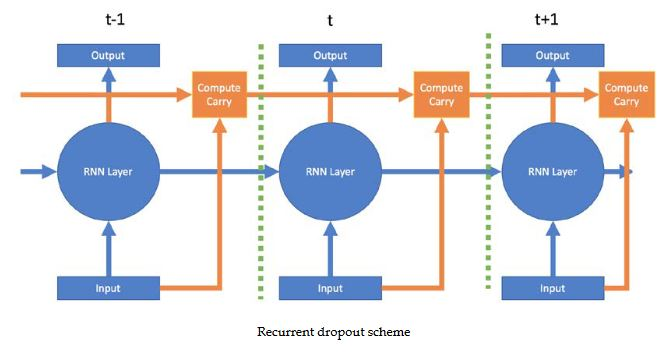

Recurrent dropouts have a regularizing effect and can prevent overfitting. The following code shows that recurrent dropouts do not have own layers:

In [ ]:
model <- keras_model_sequential()
model %>%
  layer_lstm(16, recurrent_dropout=0.1, return_sequences=True, input_shape=(max_len,n_features))) %>%
  layer_lstm(16, recurrent_dropout=0.1) %>%
  layer_dense(1)

keras_compile(model, optimizer='adam', loss='mean_absolute_percentage_error')
summary(model)

# Bayesian deep learning

---



Bayesian deep learning couples Bayesian approaches with deep learning in order to allow models to express uncertainty. The main idea is the concept of inherent uncertainty present in the model. A simple trick to turn regular deep networks into Bayesian deep networks is to activate dropout during predictions and then make multiple predictions. 20 random values between -5 and 5 are used as X values and the sine function of these values are the Y values.

In [ ]:
X <- runif(20)*10-5
Y <- sin (X)
Z <- rbind(X,Y)
Z
length(X)
length(Y)

The neural network is relatively straightforward. However, Keras does not allow for a dropout layer in the first layer, wherefore, a Dense layer needs to be added which passes the input value through.

In [ ]:
#install.packages('keras', repos='http://cran.rstudio.com/')
library(keras)
#install.packages('tensorflow', repos='http://cran.rstudio.com/')
library(tensorflow)
#install.packages('tidyverse', repos='http://cran.rstudio.com/')
library(tidyverse)
model <- keras_model_sequential()
model %>% 
  layer_dense(1) %>% 
  
  layer_dropout(rate = 0.1) %>%
  layer_dense(units = 20, activation = 'relu') %>%
  layer_dropout(rate = 0.1) %>%
  layer_dense(units = 20, activation = 'relu') %>%
  layer_dropout(rate = 0.1) %>%
  layer_dense(units = 20, activation = 'sigmoid') %>%
  layer_dense(1)

Only a relatively low learning rate is needed to fit this function, so the Keras vanilla stochastic gradient descent optimized is imported in order to set the learning rate there. The model is trained for 10,000 epochs.

In [ ]:
model %>% compile(
  optimizer_sgd(lr = 0.1),
  loss_mean_squared_error
)
model %>% fit(
  x = X,
  y = Y,
  epochs = 10000,
  batch_size = 10,
  verbose = getOption("keras.fit_verbose", default = 0)
)

To test the model over a larger range of values, a test data set with 200 values ranging from -10 to 10 in 0.1 intervals is created.

In [ ]:
#install.packages('listarrays', repos='http://cran.rstudio.com/')
library(listarrays)
X_Test <- seq(-10,10,0.1)
X_Test <- expand_dims(X_Test, -1)

Using keras.backend  the settings are passed to TensorFlow, which runs the operations in the background. The backend is used to set the learning parameter to 1. The Tensor flow will believe that it is in a state of training and will apply dropout. Then, 100 predictions for the test data are made. The result is a probability distribution for the y value at every instance of x.

To start the process:

1. Run the following code:

In [ ]:
#install.packages('tensorflow', repos='http://cran.rstudio.com/')
library(tensorflow)
k_clear_session()
k_set_learning_phase(1)

2. obtain Obtain the distributions with the following code:

In [ ]:
probs <- c()
for (i in 1:100){
  out <- predict(model, X_Test)
  probs <- append(probs, out)
}

3. Calculate the mean and the standard deviation for the distributions:


In [ ]:
p <- matrix(probs, ncol = 1, byrow =TRUE)
mean <- mean(p)
sd <- sd(p)
mean
sd
dim(p)
# The result should a probability distribution for the y value for every x value. p, the matrix in which the results of the model is saved, has the wrong dimension. 
# mean(p) should provide a column vector of means for every row entry. Our result is a scalar. Therefore, the results cannot be plotted.

4. Plot the model's predictions with one, two, and four standard deviations:

In [ ]:
#install.packages('ggplot2', repos='http://cran.rstudio.com/')
library(ggplot2)
X_Test_Plot <- data.frame(X_Test)
ggplot(X_Test_Plot,aes(x = X_Test_Plot[,1], y= mean))+
  geom_line(aes(color = 'blue'))+
  geom_ribbon(aes(ymin=mean-sd*0.5,ymax=mean+sd*0.5),alpha="0.25",fill="blue")+
  geom_ribbon(aes(ymin=mean-sd,ymax=mean+sd),alpha="0.25",fill="blue")+
  geom_ribbon(aes(ymin=mean-sd*2,ymax=mean+sd*2),alpha="0.25",fill="blue")+
  geom_point(aes(X,Y), color='black')



The graph shows that the model is confident around the areas where data exists and less confident the further it gets from the data points. 

# Summary

This chapter provided a broad range of tools for dealing with time series data, insights into how one-dimensional convolution and recurrent architecture works as well as a simple way to train a model to express uncertainty. 
Recap of the things covered in this chapter:

*   Basic data exploration
*   Fourier transformation and autocorrelation
*   Median forecasting as baseline and sanity check

*   Classic prediction models, ARIMA and Kalman filters
*   Feature design including data loading mechanisms
*   One-dimensional convolutions and variants
*   RNNs and LSTMs
*   Modeling uncertainty through Bayesian deep learning 




